# 第3章 神经网络

## 3.1 从感知机到神经网络

In [12]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math

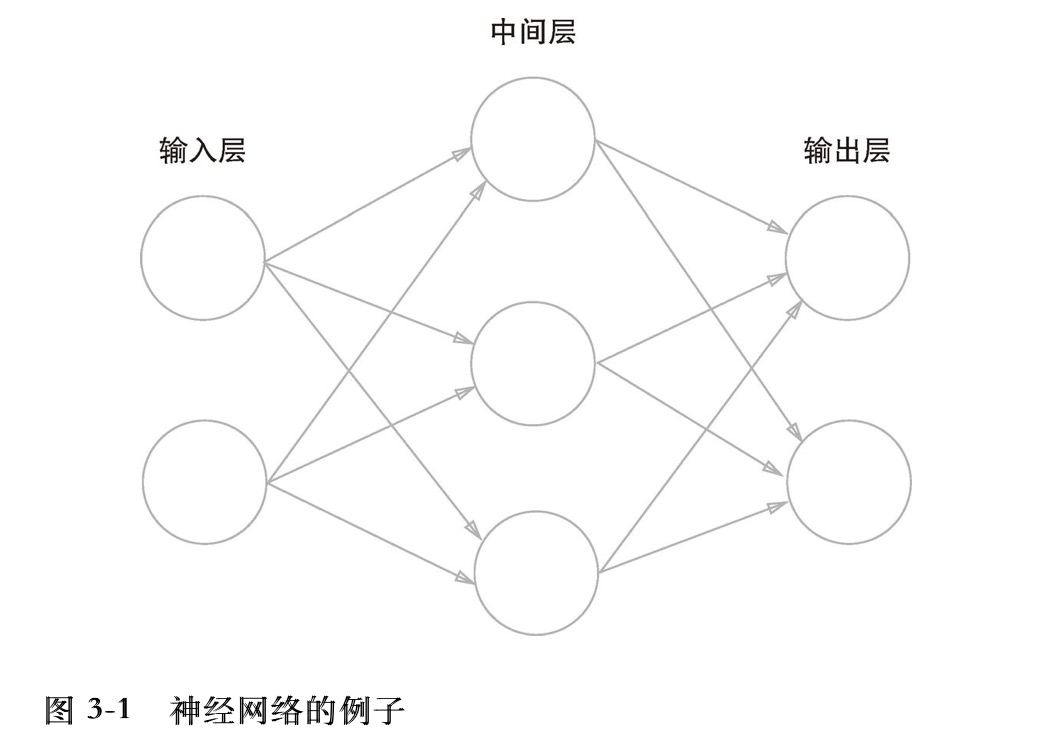

In [3]:
Image(filename='3_1.png', width=400, height=400)

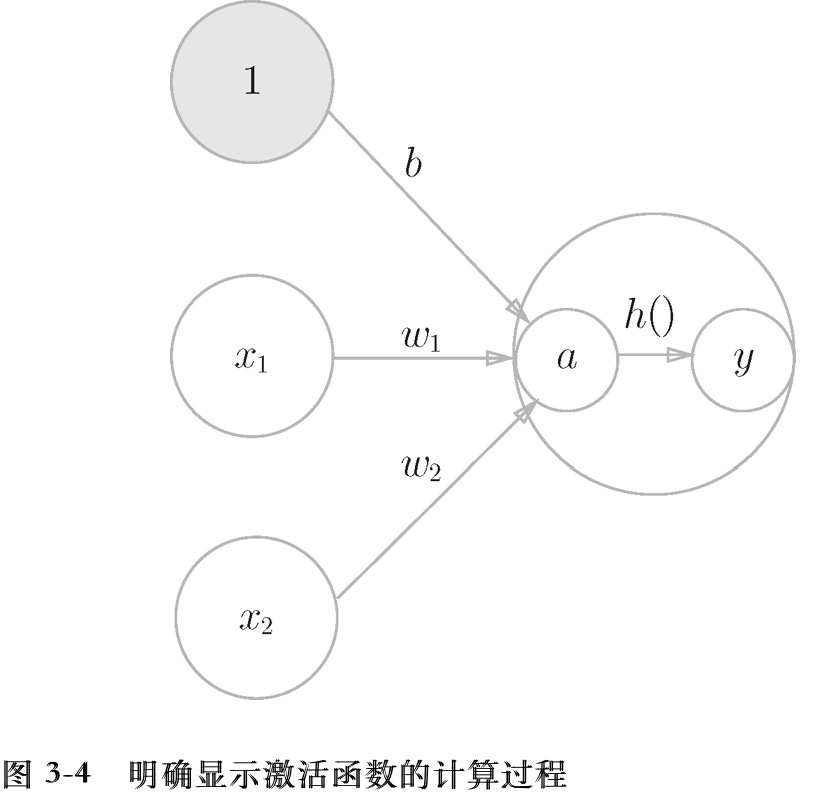

In [4]:
Image(filename='3_4.png', width=400, height=400)

## 3.2 激活函数

### 3.2.1 sigmoid函数

In [57]:
%%latex
\[ y = \frac{1}{1 + exp(-x)}\ \]

<IPython.core.display.Latex object>

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

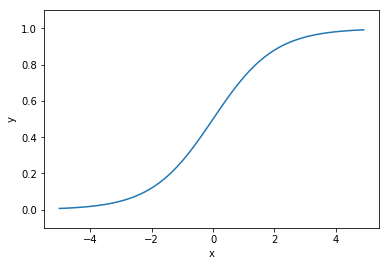

In [16]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3.2.2 阶跃函数

In [66]:
%%latex
\[
    y = \begin{cases}
    0, \quad x\leq 0 \\
    1, \quad x > 0\
 \end{cases}
\]

<IPython.core.display.Latex object>

In [18]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

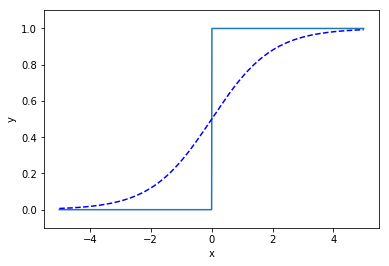

In [67]:
x = np.arange(-5, 5, 0.01)
y = step_function(x)
y1 = sigmoid(x)
plt.plot(x, y)
plt.plot(x, y1, 'b--')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3.2.3 ReLU函数

In [68]:
%%latex
\[
    y = \begin{cases}
    0, \quad x\leq 0 \\
    x, \quad x > 0\
 \end{cases}
\]

<IPython.core.display.Latex object>

In [25]:
def relu(x):
    return np.maximum(0, x)

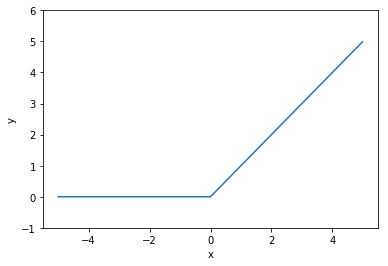

In [28]:
x = np.arange(-5, 5, 0.01)
y = relu(x)

plt.plot(x, y)

plt.ylim(-1, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 3.3 多维数组的运算

In [30]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B)
print(C)

[[19 22]
 [43 50]]


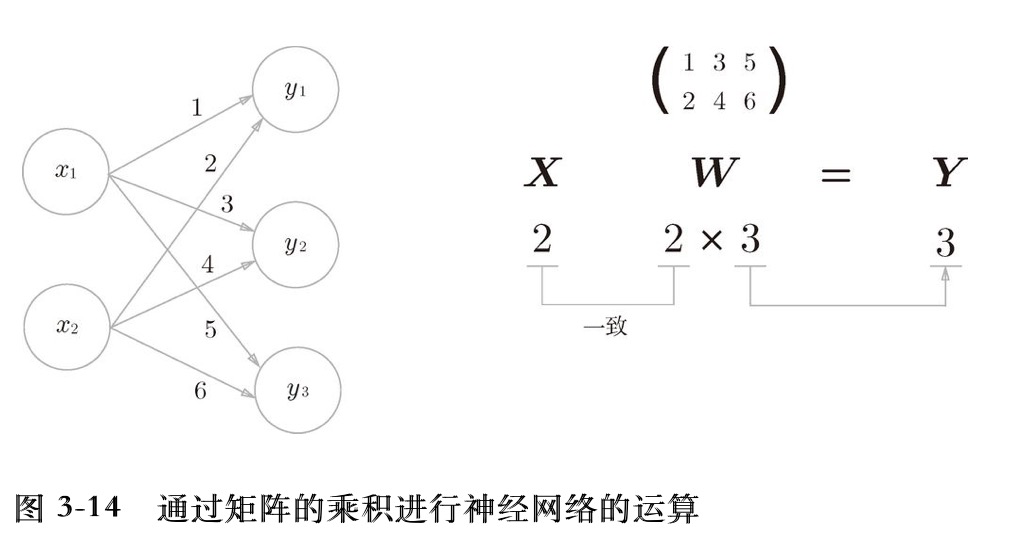

In [32]:
Image(filename='3_14.png')

In [33]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3层神经网络的实现

In [47]:
def identity_function(x):
    return x

In [45]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [46]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(a1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(a2, W3) + b3
    # z3 = sigmoid(a3)
    # y = identity_function(z3)
    y = identity_function(a3)
    return y

In [48]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.426 0.912]


## 3.5 输出层的设计

**机器学习的问题可分为两类：分类问题，回归问题。**  
**分类问题：数据属于哪一个类别**  
**回归问题：根据某个输入预测一个（连续的）数值的问题。**  
一般而言， 回归问题用恒等函数，分类问题用softmax函数

### 3.5.2 softmax函数

In [58]:
%%latex
\[ y_{k} = \frac{exp(a_{k} - a_{max})}{\Sigma_{i=1}^{n}\, \exp(a_{i} - a_{max})}\ \]

<IPython.core.display.Latex object>

In [52]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [53]:
a = np.array([0.3, 2.9, 4])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [54]:
np.sum(y)

1.0

## 3.6 手写数字识别